In [13]:
import pandas as pd
import numpy as np
from factor_analyzer import FactorAnalyzer
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# 예제 데이터 (심리 설문 데이터)
data = pd.read_csv("../preprocessed/preprocessed_hotel.csv")

# object 타입 변수 목록 출력
removed_columns = data.select_dtypes(include=['object']).columns.tolist()
print("제거된 열:", removed_columns)

# object 타입 변수 제거
data_cleaned = data.select_dtypes(exclude=['object'])

data_cleaned

제거된 열: ['Hotel_Name', 'Review_Text', 'Posted_Date', 'review_title', 'Crawled_date']


,Rating,Average_Rating,Num_of_Ratings,Helpfulness,is_photo,hotel_grade,employee_friendliness_score,facility_score,cleanliness_score,comfort_score,value_for_money_score,location_score,time_lapsed
0,10.0,7.6,11670,0,0,3,8.3,7.5,7.9,7.8,7.6,9.3,218
1,8.0,7.6,11670,0,0,3,8.3,7.5,7.9,7.8,7.6,9.3,3
2,8.0,7.6,11670,0,0,3,8.3,7.5,7.9,7.8,7.6,9.3,4
3,9.0,7.6,11670,0,0,3,8.3,7.5,7.9,7.8,7.6,9.3,4
4,8.0,7.6,11670,0,0,3,8.3,7.5,7.9,7.8,7.6,9.3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
101688,10.0,7.8,6248,0,0,3,9.0,7.7,8.2,8.2,8.0,9.4,708
101689,10.0,7.8,6248,0,0,3,9.0,7.7,8.2,8.2,8.0,9.4,888
101690,10.0,7.8,6248,0,1,3,9.0,7.7,8.2,8.2,8.0,9.4,891
101691,10.0,7.8,6248,0,1,3,9.0,7.7,8.2,8.2,8.0,9.4,1023


KMO Test: 0.7406184610135378, Bartlett’s Test p-value: 0.0

요인 부하량 (Factor Loadings):
                                    0         1
Rating                       0.217657  0.051335
Average_Rating               0.911378  0.262760
Num_of_Ratings              -0.119599 -0.656972
Helpfulness                 -0.003575 -0.006750
is_photo                     0.025506  0.040005
hotel_grade                  0.138658  0.987817
employee_friendliness_score  0.808525  0.145398
facility_score               0.885215  0.398573
cleanliness_score            0.961527  0.247449
comfort_score                0.928597  0.314362
value_for_money_score        0.771210  0.048185
location_score               0.287154 -0.367308
time_lapsed                  0.044856 -0.003259

공통성 (Communalities):
                             Communality
Rating                          0.050010
Average_Rating                  0.899654
Num_of_Ratings                  0.445916
Helpfulness                     0.000058
is_photo       

/opt/homebrew/Cellar/jupyterlab/4.3.3/libexec/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


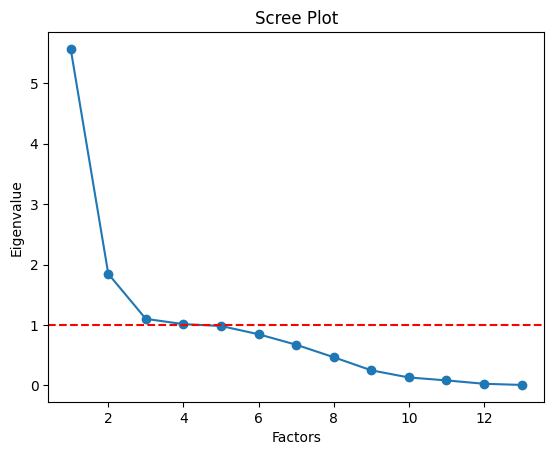

In [14]:
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_kmo, calculate_bartlett_sphericity
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler

# 데이터 표준화
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_cleaned)

# KMO 및 Bartlett 검정
kmo_all, kmo_model = calculate_kmo(data_scaled)
chi_square_value, p_value = calculate_bartlett_sphericity(data_scaled)
print(f"KMO Test: {kmo_model}, Bartlett’s Test p-value: {p_value}")

# 요인 분석 실행 (요인 개수 = 2개)
fa = FactorAnalyzer(n_factors=2, method='ml', rotation='varimax')
fa.fit(data_scaled)

# 요인 부하량(Factor Loadings) 출력
loadings = pd.DataFrame(fa.loadings_, index=data_cleaned.columns)
print("\n요인 부하량 (Factor Loadings):")
print(loadings)  

# 공통성(Communalities) 출력
communalities = pd.DataFrame(fa.get_communalities(), index=data_cleaned.columns, columns=["Communality"])
print("\n공통성 (Communalities):")
print(communalities) 

# 스크리 플롯 (참고용, 실제 요인 개수는 2개로 고정)
eigenvalues, _ = fa.get_eigenvalues()
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o')
plt.axhline(y=1, color='r', linestyle='--')  # 기준선 추가
plt.xlabel("Factors")
plt.ylabel("Eigenvalue")
plt.title("Scree Plot")
plt.show()
